# Train and Test with best params combination

## Data Preparation

In [1]:
import os
import sys

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

In [2]:
tf.__version__

'2.2.0'

In [3]:
import sklearn; sklearn.__version__

'0.21.2'

In [4]:
# load dataset
features = pandas.read_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features_1.csv', index_col=0)
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
0,-0.236240,-0.012063,-0.027807,-0.051443,-0.082820,-0.237137,-0.011746,-0.027222,-0.051066,-0.082349,...,48729.0,24515.0,1367.0,236539.0,100477.0,48721.0,24523.0,10601.0,5868.0,2136.0
1,-0.733787,-0.017003,-0.045150,-0.053358,-0.045559,-0.728479,-0.016115,-0.044458,-0.053728,-0.045010,...,40467.0,21751.0,4280.0,232788.0,104560.0,40835.0,21922.0,11688.0,5678.0,4187.0
2,-0.206548,-0.001990,-0.004977,-0.010344,-0.032882,-0.206663,-0.001933,-0.004869,-0.009837,-0.031671,...,51110.0,28460.0,3429.0,238953.0,98627.0,50426.0,28197.0,12380.0,5750.0,2853.0
3,-0.505051,-0.017088,-0.050502,-0.085439,-0.155965,-0.503971,-0.016430,-0.050478,-0.080363,-0.153229,...,46009.0,24784.0,4084.0,239878.0,106315.0,46383.0,25001.0,10550.0,6405.0,3401.0
4,-0.265025,-0.007068,-0.017015,-0.033292,-0.048008,-0.263057,-0.006823,-0.016241,-0.032975,-0.046946,...,50126.0,21473.0,3355.0,235508.0,96446.0,50054.0,21542.0,11100.0,6028.0,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,-0.104572,-0.000267,-0.001287,-0.004655,-0.018606,-0.104197,-0.000241,-0.001230,-0.004309,-0.018012,...,111718.0,57071.0,5266.0,478728.0,194404.0,110085.0,56729.0,26120.0,10705.0,4714.0
3333,-0.064313,-0.000214,-0.000820,-0.004044,-0.013585,-0.064493,-0.000202,-0.000685,-0.003693,-0.013236,...,100899.0,57721.0,5961.0,378640.0,180357.0,98690.0,57296.0,25947.0,13375.0,3125.0
3334,-0.477425,-0.000967,-0.004003,-0.008481,-0.038837,-0.476932,-0.000873,-0.004009,-0.007479,-0.036333,...,95367.0,62597.0,3067.0,491052.0,210852.0,92628.0,61759.0,24119.0,12008.0,6321.0
3335,-0.328624,-0.001875,-0.008336,-0.021885,-0.049970,-0.329515,-0.001693,-0.008131,-0.021180,-0.048207,...,101933.0,50380.0,5290.0,483699.0,219884.0,100631.0,49950.0,30214.0,9810.0,5397.0


In [5]:
# shuffle dataset
features = features.reindex(numpy.random.permutation(features.index))
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
1346,-0.748758,-0.002477,-0.020669,-0.126376,-0.290251,-0.745402,-0.001888,-0.017639,-0.123680,-0.291078,...,128577.0,47773.0,5718.0,402554.0,204902.0,127534.0,47695.0,18815.0,11424.0,7370.0
1813,-0.770108,-0.002247,-0.017140,-0.075761,-0.183420,-0.769781,-0.001711,-0.015316,-0.074247,-0.189405,...,117884.0,47090.0,5101.0,395828.0,213116.0,117388.0,47285.0,22671.0,12024.0,6215.0
721,-0.137055,-0.001207,-0.007720,-0.022693,-0.052166,-0.137776,-0.001016,-0.007491,-0.022345,-0.053093,...,104537.0,46687.0,6580.0,429269.0,247843.0,104533.0,46605.0,26768.0,12953.0,4499.0
2145,-0.239898,-0.000932,-0.004813,-0.027519,-0.071030,-0.239022,-0.000818,-0.004214,-0.026674,-0.072078,...,121959.0,43160.0,7261.0,339789.0,222741.0,121684.0,43191.0,23293.0,12706.0,6265.0
1743,-0.655971,-0.010216,-0.047121,-0.168804,-0.297500,-0.657854,-0.009366,-0.043061,-0.168294,-0.290953,...,112868.0,41204.0,7084.0,484595.0,207036.0,112923.0,41222.0,24520.0,12245.0,4858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,-0.318184,-0.012716,-0.031223,-0.044816,-0.084912,-0.319805,-0.012246,-0.030909,-0.043805,-0.083613,...,97781.0,48888.0,5502.0,528676.0,161949.0,98260.0,48916.0,25097.0,10934.0,5729.0
1368,-0.250562,-0.002454,-0.007012,-0.014697,-0.031577,-0.250148,-0.002358,-0.006845,-0.014552,-0.031220,...,103337.0,50393.0,7221.0,525023.0,183338.0,103077.0,50337.0,24865.0,12837.0,5488.0
108,-0.718823,-0.014359,-0.017879,-0.022410,-0.056811,-0.718004,-0.014253,-0.017587,-0.021093,-0.054865,...,49737.0,25602.0,4102.0,188465.0,80834.0,49349.0,25497.0,13205.0,7546.0,3105.0
3225,-0.719526,-0.005721,-0.015962,-0.049748,-0.158838,-0.713099,-0.005573,-0.015035,-0.048323,-0.154281,...,108390.0,56257.0,8219.0,489933.0,204060.0,107003.0,56209.0,24324.0,10650.0,7529.0


In [6]:
# split dataset into target (y) and predictors (x)
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]

In [7]:
(timbral_rhythmic_predictors, predictors_with_pos_corr,
 wavelet_predictors) = break_into_subsets(features)

In [8]:
norm_pipelines = create_norm_pipelines(features)

In [9]:
# split into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [10]:
list_ncols = [360, 108, 167, 252]

In [11]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

## Predictive Modelling

In [12]:
params = {
    'units': 2, 'optimizer': 'adam', 'n_hidden': 2, 'lr': 0.0003,
    'kernel_initializer': 'glorot_uniform', 'filters': 32,
    'dropout': 0.15, 'activation': 'selu'
}

In [13]:
model_all = training_best_model(X_train, y_train,
                                'model_all', list_ncols[0],
                                set_shape_create_cnn_model, 
                                norm_pipelines['all'], params, 
                                batch_size=32, epochs=100)

Model: "model_all"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 179, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 43, 96)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4128)              0 

Epoch 45/100
67/67 [==============================] - 2s 28ms/step - loss: 0.6234 - accuracy: 0.6890 - val_loss: 0.6146 - val_accuracy: 0.7678
Epoch 46/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6106 - accuracy: 0.6899 - val_loss: 0.5699 - val_accuracy: 0.7734
Epoch 47/100
67/67 [==============================] - 2s 26ms/step - loss: 0.5952 - accuracy: 0.7026 - val_loss: 0.5623 - val_accuracy: 0.7491
Epoch 48/100
67/67 [==============================] - 1s 20ms/step - loss: 0.5989 - accuracy: 0.7059 - val_loss: 0.5643 - val_accuracy: 0.7678
Epoch 49/100
67/67 [==============================] - 2s 31ms/step - loss: 0.5925 - accuracy: 0.6998 - val_loss: 0.5648 - val_accuracy: 0.7697
Epoch 50/100
67/67 [==============================] - 3s 37ms/step - loss: 0.5868 - accuracy: 0.6960 - val_loss: 0.5770 - val_accuracy: 0.7828
Epoch 51/100
67/67 [==============================] - 3s 38ms/step - loss: 0.5810 - accuracy: 0.7105 - val_loss: 0.5653 - val_accuracy: 0.7603

Instructions for updating:
Please use `model.predict()` instead.


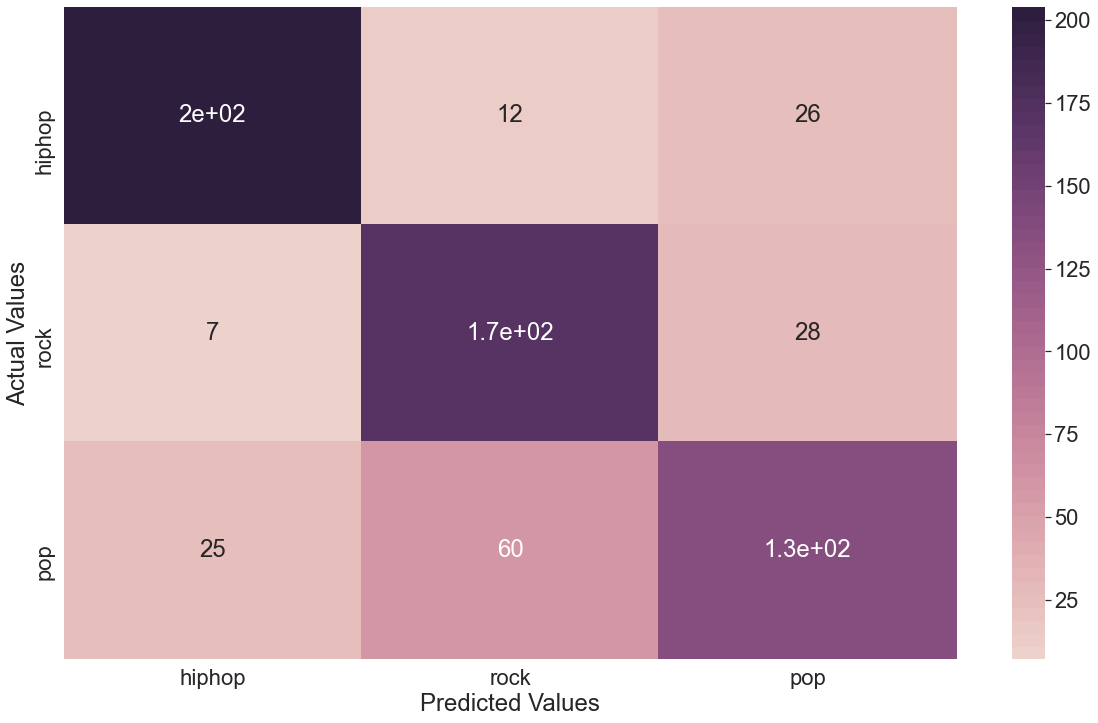

In [14]:
visualize_conf_metrics(X_test, y_test_encoded, model_all)

In [15]:
model_all.score(X_test, y_test)

21/21 [==============================] - 0s 7ms/step - loss: 0.5984 - accuracy: 0.7635


0.7634730339050293

In [18]:
(accuracy, precision, recall, f1_score) = evaluate_model(X_test, y_test, model_all)

In [ ]:
model_all.predict(X_test)

In [20]:
accuracy, precision, recall, f1_score

(0.7634730538922155,
 0.7049180327868853,
 0.8309178743961353,
 0.7627494456762749)

### FNN With Standardized Input

In [ ]:
(fnn1_best_score, fnn1_best_params, fnn1_best_estimator) = \
train_model(X_train, y_train, 'fnn_1', ncols, set_shape_create_model,
            pipeline_estimator_sp, param_dist)

### FNN With Normalized Input

In [ ]:
(fnn2_best_score, fnn2_best_params, fnn2_best_estimator) = \
train_model(X_train, y_train, 'fnn_2', ncols, set_shape_create_model,
            pipeline_estimator_np, param_dist)

### CNN With Standardized Input

In [ ]:
param_dist = {
    'clf__n_hidden': [1, 2, 3],
    'clf__activation': ['relu', 'elu', 'selu'],
    'clf__optimizer': ['rmsprop','adam','adagrad'],
    'clf__kernel_initializer':['glorot_uniform','normal','uniform'],
    'clf__units': numpy.arange(1,100),
    'clf__filters': [16, 32, 64],
#     'clf__kernel_size': [3,4,5],
    'clf__dropout':[.1, .15, .2, .25],
    'clf__lr': [3, 1, .3, .1, .03, .01, .003, .001, .0003, .0001],
}

In [ ]:
(cnn1_best_score, cnn1_best_params, cnn1_best_estimator) = \
train_model(X_train, y_train, 'cnn_1', ncols, set_shape_create_cnn_model,
            pipeline_estimator_sp, param_dist)

### CNN With Normalized Input

In [ ]:
(cnn2_best_score, cnn2_best_params, cnn2_best_estimator) = \
train_model(X_train, y_train, 'cnn_2', ncols, set_shape_create_cnn_model,
            pipeline_estimator_np, param_dist)